In [29]:
# Importing necessary libraries
# NumPy provides support for large, multi-dimensional arrays and matrices.
import numpy as np
# Pandas provides support for data manipulation and analysis.
import pandas as pd
# Matplotlib.pyplot is a plotting library in Python that provides a MATLAB-like interface for creating visualizations.
import matplotlib.pyplot as plt

In [30]:
# Load the dataset
data = pd.read_csv("CKD.csv")

In [31]:
# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)
print(data.head(4))

   age         bp   al   su         bgr         bu        sc         sod  \
0  2.0  76.459948  3.0  0.0  148.112676  57.482105  3.077356  137.528754   
1  3.0  76.459948  2.0  0.0  148.112676  22.000000  0.700000  137.528754   
2  4.0  76.459948  1.0  0.0   99.000000  23.000000  0.600000  138.000000   
3  5.0  76.459948  1.0  0.0  148.112676  16.000000  0.700000  138.000000   

        pot       hrmo  ...  pc_normal  pcc_present  ba_present  htn_yes  \
0  4.627244  12.518156  ...          0            0           0        0   
1  4.627244  10.700000  ...          1            0           0        0   
2  4.400000  12.000000  ...          1            0           0        0   
3  3.200000   8.100000  ...          1            0           0        0   

   dm_yes  cad_yes  appet_yes  pe_yes  ane_yes  classification_yes  
0       0        0          1       1        0                   1  
1       0        0          1       0        0                   1  
2       0        0          1  

In [32]:
# Create the dependent variable (target)
dependent = data[["classification_yes"]]

In [34]:
# Create the independent variables (features)
independent = data[['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes']]
independent.columns

Index(['age', 'bp', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hrmo', 'pcv',
       'wc', 'rc', 'sg_b', 'sg_c', 'sg_d', 'sg_e', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_yes', 'pe_yes', 'ane_yes'],
      dtype='object')

In [35]:
# Importing train_test_split from sklearn.model_selection
# This function is used for splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

In [36]:
# Splitting data into training and testing sets
# Train and test split ratio is 70% and 30% respectively
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [37]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Importing KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# Importing GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [40]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

In [41]:
# Initialize GridSearchCV with f1_macro scoring
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

In [42]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of

C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [43]:
# Print the best hyperparameters found by GridSearchCV
best_knn_neighbour = grid_search.best_estimator_
best_knn_neighbour

KNeighborsClassifier(p=1)

In [44]:
# Predict on the test set
test_predictions = best_knn_neighbour.predict(X_test)

C:\Users\AB92922\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:
# Retrieve cross-validation results
cv_results = grid_search.cv_results_

In [46]:
# Importing necessary libraries for evaluation metrics
from sklearn.metrics import confusion_matrix  # Importing confusion matrix to evaluate classification performance
from sklearn.metrics import classification_report  # Importing classification report to summarize classification performance
from sklearn.metrics import roc_curve, roc_auc_score  # Importing ROC curve and AUC score for binary classification evaluation

In [47]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[45  0]
 [ 6 69]]


In [48]:
#Classification report
classification_rep = classification_report(y_test, test_predictions)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        45
           1       1.00      0.92      0.96        75

    accuracy                           0.95       120
   macro avg       0.94      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



In [49]:
# ROC AUC score
test_probabilities = best_knn_neighbour.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, test_probabilities)
print(f"ROC AUC Score: {roc_auc}")

ROC AUC Score: 0.9995555555555555


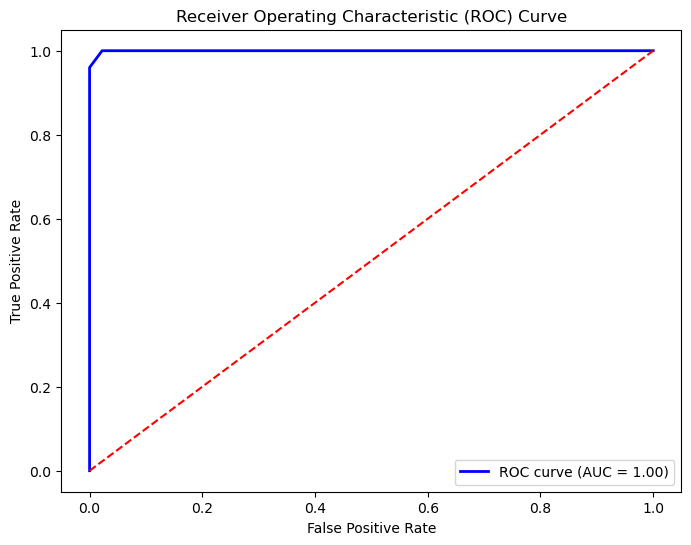

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, test_probabilities)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
